# Aligning Gene & Protein Sequences
by Ryan Byrne

In [531]:
%load_ext autoreload
%autoreload 2
import sys,os; sys.path.append(os.environ['BMESAHMETDIR']);import bmes

import re
import Bio
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

def fasta_readfirst(file):
    from Bio import SeqIO
    for ret in SeqIO.parse(file,'fasta'): return ret;
    
def dotplotfilt(N, winSize, winFilt):
    seq1len = N.shape[0]
    seq2len = N.shape[1]
    B = np.copy(N)
    for i in range(0, seq1len):
        for j in range(0, seq2len):
            Arr = N[i:i+winSize, j:j+winSize]
            count = 0
            count2 = 0
            for n in range(min(Arr.shape[0], Arr.shape[1])):
                if Arr[n][n] == 1:
                    count += 1
            k = 0
            for n in range(min(Arr.shape[0], Arr.shape[1])-1, 0, -1):
                if Arr[k][n] == 1:
                    count2 += 1
                k += 1
            if (count < winFilt and count2 < winFilt):
                B[i, j] = 0
    return B
                
def seqdotplot(seq1, seq2, winSize = 1, winFilt = 1):
    seq1len = len(seq1)
    seq2len = len(seq2)
    N = np.zeros([seq1len, seq2len], dtype = int)
    for i in range(0, seq1len):
        for j in range(0, seq2len):
            if (seq1[i] == seq2[j]):
                N[i][j] = 1
    H = dotplotfilt(N, winSize, winFilt)
    x = []
    y = []
    for i in range(0, seq1len):
        for j in range(0, seq2len):
            if (H[i][j] == 1):
                x.append(i)
                y.append(j)    
    plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
    plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True
    fig, ax = plt.subplots()
    mSize = 2* seq1len / len(x)
    ax.plot(x, y, 'ko', markersize=mSize)
    plt.axis([min(x), max(x), max(y), 0])
    ax.set_ylabel('Sequence 1')
    ax.set_xlabel('Sequence 2')
    ax.xaxis.set_label_position('top')
    
def aminoAcidFreq(seq):
    seqDict = {}
    seqlen = len(seq)
    for aa in seq:
        if aa in seqDict:
            seqDict[aa] += 1
        else:
            seqDict[aa] = 1
    max_key = max(seqDict, key=seqDict.get)
    all_seq = seqDict.values()
    maxfreq = max(all_seq)
    maxfreqper = maxfreq/seqlen * 100
    return {max_key: maxfreqper}
    
def printCutAlignment(Alignment, cutVal):
    results = [m.start() for m in re.finditer('\n', Alignment)]
    seq1 = Alignment[0:results[0]]
    alignState = Alignment[results[0]+1:results[1]]
    seq2 = Alignment[results[1]+1:results[2]]
    print("1 " + seq1[0:cutVal] + '\n' + "  " + alignState[0:cutVal] + '\n' +  "2 " +seq2[0:cutVal])
    
def calcPercIden(Alignment):
    results = [m.start() for m in re.finditer('\n', Alignment)]
    alignState = Alignment[results[0]+1:results[1]]
    count = 0
    for sign in alignState:
        if (sign == '|'):
            count += 1
    return count / len(alignState)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Obtain the gene sequences
Find the hemoglobin subunit alpha-1 genes and proteins for human and Pacific white-sided dolphin. Obtain the sequences of these genes and proteins and download them into the files:

In [5]:
hgenefile=bmes.downloadurl('https://www.ncbi.nlm.nih.gov/sviewer/viewer.cgi?tool=portal&save=file&log$=seqview&db=nuccore&report=fasta&id=568815582&from=176651&to=177522&extrafeat=null&conwithfeat=on','human.hemoglobin.alpha1.gene.fasta')
dgenefile=bmes.downloadurl('https://www.ncbi.nlm.nih.gov/sviewer/viewer.cgi?tool=portal&save=file&log$=seqview&db=nuccore&report=fasta&id=1511261435&from=13497651&to=13498490&strand=on&extrafeat=null&conwithfeat=on','dolphin.hemoglobin.alpha1.gene.fasta')
hptnfile=bmes.downloadurl('https://www.ncbi.nlm.nih.gov/sviewer/viewer.cgi?tool=portal&save=file&log$=seqview&db=protein&report=fasta&id=4504345&extrafeat=8&conwithfeat=on','human.hemoglobin.alpha1.ptn.fasta')
dptnfile=bmes.downloadurl('https://www.ncbi.nlm.nih.gov/sviewer/viewer.cgi?tool=portal&save=file&log$=seqview&db=protein&report=fasta&id=1516118871&extrafeat=8&conwithfeat=on','dolphin.hemoglobin.alpha1.ptn.fasta')

Read in the fasta files.

In [405]:
humgene = fasta_readfirst(hgenefile)
dolgene = fasta_readfirst(dgenefile)
humptn = fasta_readfirst(hptnfile)
dolptn = fasta_readfirst(dptnfile)
print(humgene)

ID: NC_000016.10:176651-177522
Name: NC_000016.10:176651-177522
Description: NC_000016.10:176651-177522 Homo sapiens chromosome 16, GRCh38.p13 Primary Assembly
Number of features: 0
Seq('CATAAACCCTGGCGCGCTCGCGGCCCGGCACTCTTCTGGTCCCCACAGACTCAG...GCA')


# Gene Dot plot
Show sequence dotplot of the the human and dolphin genes. Filter out using a window size of 3, and a match number of 3.

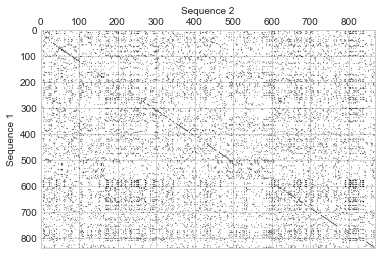

In [412]:
seqdotplot(humgene.seq, dolgene.seq, 3, 3)

# Protein Dot plot
Show sequence dotplot of the the human and dolphin protein sequences Do not use any filters.

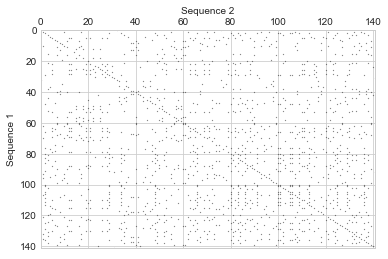

In [413]:
seqdotplot(humptn.seq, dolptn.seq)

# Amino acid percentage frequency
Find out which amino acid has the highest frequency in the human protein. Report the single letter amino acid code for it, along with its frequency (as a percentage).

In [195]:
#Output as a dictionary with amino acid and its frequency as a percent
print(aminoAcidFreq(humptn.seq))

{'A': 14.788732394366196}


# Alignment of Genes
Perform global alignment of the gene sequences (use default parameters). Show the alignment score and up to first 60 columns of the alignment.
Perform local alignments of the gene sequences (use default parameters) Show the alignment score and up to 60 columns of the alignment. What is the percent identity of the entire alignment (Use the entire alignment for your calculation, not just of first 60 columns)?

In [533]:
#Matlabs baseline gap opening penalty is 8 and 1
#Using BLOSUM50 as base submat
gap_open=-8;
gap_extend=-1;
submat = Bio.Align.substitution_matrices.load("BLOSUM50");

from Bio import pairwise2
align=pairwise2.align.globalds(humgene.seq,dolgene.seq, submat, gap_open, gap_extend)
ali = pairwise2.format_alignment(*(align[0]))
printCutAlignment(ali, 60)
print('  Score = %0.2f' % align[0][2])
print("Percent Identity: %0.4f" % calcPercIden(ali))

align2=pairwise2.align.localds(humgene.seq,dolgene.seq, submat, gap_open, gap_extend)
ali = pairwise2.format_alignment(*(align[0]))
printCutAlignment(ali, 60)
print('  Score = %0.2f' % align[0][2])
print("Percent Identity: %0.4f" % calcPercIden(ali))

1 CATAAACCCTGGCGC-------------GCTCGCG--------GCCCGGCACTCTTCTGG
  |     ||||.||||             |||||||        ||||.||||.|||||||
2 C-----CCCTCGCGCCCCAGGCATAAAGGCTCGCGCACTGCCAGCCCTGCACGCTTCTGG
  Score = 5496.00
Percent Identity: 0.7375
1 CATAAACCCTGGCGC-------------GCTCGCG--------GCCCGGCACTCTTCTGG
  |     ||||.||||             |||||||        ||||.||||.|||||||
2 C-----CCCTCGCGCCCCAGGCATAAAGGCTCGCGCACTGCCAGCCCTGCACGCTTCTGG
  Score = 5496.00
Percent Identity: 0.7375


# Alignment of Proteins
Perform global alignment of the protein sequences. Use PAM30 substitution matrix, and an affine gap penalty with gap opening penalty of 8 and gap extension penalty of 1. Show the alignment score and the first 60 columns of the alignment. What is the percent identity of the entire alignment (not just of first 60 columns)?

In [532]:
gap_open=-8;
gap_extend=-1;

from Bio import pairwise2
import re
submat = Bio.Align.substitution_matrices.load("pam30");
align=pairwise2.align.globalds(humptn.seq,dolptn.seq, submat, gap_open, gap_extend)
ali = pairwise2.format_alignment(*(align[0]))

printCutAlignment(ali, 60)
print('  Score = %0.2f' % align[0][2])
print("Percent Identity: %0.4f" % calcPercIden(ali))

1 MVLSPADKTNVKAAWGKVGAHAGEYGAEALERMFLSFPTTKTYFPHFDLSHGSAQVKGHG
  ||||||||||||..|.|.|.|..|||||||||||..||.|||||.||||.|||||.||||
2 MVLSPADKTNVKGTWSKIGNHSAEYGAEALERMFINFPSTKTYFSHFDLGHGSAQIKGHG
  Score = 874.00
Percent Identity: 0.8380


# Custom substitution matrix
Given the DNA sequences ACGTATCGCGTATA and GATGCTCTCGGAAA, find the optimal local alignment and its score. Matches, mismatches, and gaps are scored as +1, 0, and -1, respectively. You can use swalign() to solve this problem. You need to specity the 'alphabet' to be nucleotide and provide your own substitution matrix using the 'ScoringMatrix' parameter. See the documentation for swalign().

In [516]:
from Bio import pairwise2
align = pairwise2.align.localms("ACGTATCGCGTATA", "GATGCTCTCGGAAA", 1, 0, -1, -1)
print(pairwise2.format_alignment(*(align[0])))


1 ACGTATCGCGTATA
  |.| .||.||.|.|
2 ATG-CTCTCGGAAA
  Score=7



3
2
1
